<a href="https://colab.research.google.com/github/Beh-noush/General-Python/blob/main/FCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Neural Network with Pytorch

In [1]:
import torch
import torch.nn as nn
import torch.optim
import torch.nn.functional as F
from sklearn import datasets

A fully-connected 2-layer network with Relu non-linearity.

In [ ]:
# class FCNN(nn.Module):
#   def __init__(self, input_dim, hidden_dim, out_dim):
#     super(FCNN, self).__init__()
#     self.preactivation_hidden = nn.Linear(input_dim,hidden_dim)
#     self.preactivation_out = nn.Linear(hidden_dim, out_dim)

#   def forward(self, x):
#     """
#     Input:
#           1-d array
#           x is the input of the Neural Net of dimension input_dim
#     Returns:
#           1-d array of dimension out_dim. The score function output.
#     """
#     preactive_1 = self.preactivation_hidden(x)
#     active_1 = F.relu(preactive_1)
#     pre_output = self.preactivation_out(active_1)
#     output = F.relu(pre_output)
#     return output

# # Why is this code wrong? 


In [2]:
class FCNN(nn.Module):
  def __init__(self, input_dim, hidden_dim, out_dim):
    super(FCNN, self).__init__()
    self.preactivation_hidden = nn.Linear(input_dim,hidden_dim)
    self.activation_hidden = nn.ReLU()
    self.preactivation_out = nn.Linear(hidden_dim, out_dim)
    self.activation_out = nn.Softmax()

  def forward(self, x):
    """
    Input:
          1-d array
          x is the input of the Neural Net of dimension input_dim
    Returns:
          1-d array of dimension out_dim. The score function output.
    """
    preactive_1 = self.preactivation_hidden(x)
    active_1 = self.activation_hidden(preactive_1)
    pre_output = self.preactivation_out(active_1)
    output = self.activation_out(pre_output)
    return output



We use this neural net on Iris dataset.

In [3]:
iris = datasets.load_iris()

In [4]:
my_net = FCNN(4, 10, 3) 

Remember it was necessary to put .float() after your dataset, otherwise an error occured complaining about the dtype double rather than float! It seems a new error!

In [6]:
list(my_net.parameters()) #It contains weights and biases.

[Parameter containing:
 tensor([[-0.0243, -0.3486, -0.1143,  0.3277],
         [-0.3769,  0.4315,  0.4363,  0.2054],
         [-0.2145,  0.0609,  0.1083,  0.1593],
         [-0.0563,  0.3580, -0.3318,  0.3421],
         [-0.0875,  0.4688,  0.2214,  0.3218],
         [ 0.1333, -0.1388, -0.2029, -0.2644],
         [ 0.1023,  0.0122, -0.2811,  0.2222],
         [ 0.0703, -0.4836, -0.2646, -0.2586],
         [ 0.1501,  0.4141,  0.4532,  0.2034],
         [ 0.3576, -0.1813,  0.1763,  0.1016]], requires_grad=True),
 Parameter containing:
 tensor([-0.0122,  0.3788, -0.3805,  0.2868, -0.4398,  0.4063, -0.0527, -0.0967,
          0.1600, -0.4755], requires_grad=True),
 Parameter containing:
 tensor([[ 0.1512, -0.1767,  0.2760,  0.1484, -0.0142,  0.1976,  0.2200, -0.2902,
           0.0649,  0.1053],
         [ 0.1699, -0.2866, -0.1320,  0.2832, -0.0341, -0.0024, -0.2327, -0.1792,
          -0.1414, -0.2480],
         [-0.1032, -0.2059,  0.1980,  0.2350,  0.1988,  0.0985,  0.2898,  0.0717,
     

To be added to this notebook!

1- Add test data and plot test acc and test loss. ***

2- Try with normalized data.

3- Save the results as well as the trained model and do another experiment with the loaded model! *******

4- Do PCA on the data.

5- Try other classifiers than FCNN.

6- Do updates on batches and not the whole dataset at each epoch! ***

In [7]:
#1- Add test data and plot test acc and test loss! 
#We can use the train-test-split function in SKLearn to make train and test splits of the entire dataset.
import sklearn.model_selection as model_selection
train_test_separated = model_selection.train_test_split(iris.data,iris.target, test_size = .1, random_state = 0)
train_data, test_data,train_label,test_label = train_test_separated

In [8]:
#We transform the splitted data arrays to pytorch tensors.
iris_train = torch.from_numpy(train_data)
iris_test = torch.from_numpy(test_data)
iris_train_labels = torch.from_numpy(train_label)
iris_test_labels = torch.from_numpy(test_label)

In [9]:
#Now, we train and test the model.
epochs = range(3000)
learning_rate = 1e-3
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(my_net.parameters(), lr = learning_rate)
iris_train = iris_train.float()
iris_test = iris_test.float()
#iris_labels_torch = torch.from_numpy(iris.target)
iris_train.requires_grad = True
train_acc_list = []
train_loss_list = []
test_acc_list = []
test_loss_list = []

for e in epochs:
   optimizer.zero_grad()
   output = my_net.forward(iris_train)
   predictions = torch.argmax(output, axis = 1)
   iris_loss = loss(output, iris_train_labels)
   iris_loss.backward()
   optimizer.step()
   accuracy = (predictions==iris_train_labels).float().mean()
   train_acc_list.append(accuracy)
   train_loss_list.append(iris_loss)

   test_output = my_net.forward(iris_test)
   test_preds = torch.argmax(test_output, axis = 1)
   iris_test_loss = loss(test_output, iris_test_labels)
   test_acc = (test_preds == iris_test_labels).float().mean()
   test_acc_list.append(test_acc)
   test_loss_list.append(iris_test_loss)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


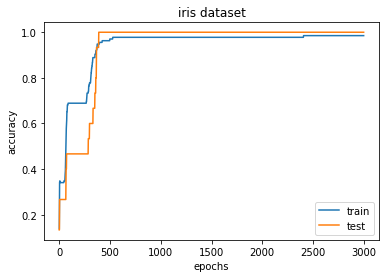

In [10]:
import matplotlib.pyplot as plt

plt.plot(epochs, train_acc_list, label = 'train')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('iris dataset')

plt.plot(epochs, test_acc_list, label = 'test')
plt.legend()

In [11]:
test_acc

tensor(1.)

In [20]:
#3- Save the results as well as the trained model and do another experiment with the loaded model!

In [16]:
results_dic = {'lr': learning_rate, 'train_acc_list' : train_acc_list, 'test_acc_list': test_acc_list, 'train_loss_list': train_loss_list, 'test_loss_list': test_loss_list, 'model_parameters':list(my_net.parameters())}

In [17]:
results_dic['model_parameters']

[Parameter containing:
 tensor([[ 0.2365, -0.8557,  1.7003,  0.9059],
         [ 1.2218,  0.3289, -1.2295, -1.3874],
         [-0.3804, -0.4954, -0.1255, -0.1048],
         [-0.6304, -1.0083,  1.4099,  1.7276],
         [ 0.0905, -0.2824,  0.7522,  1.4154],
         [ 1.4773,  1.0010, -1.1327, -1.4280],
         [ 0.0430,  0.0320, -0.4927, -0.0668],
         [-0.3413,  0.0530,  0.2631, -0.4460],
         [ 0.3266, -0.4534, -0.3845, -0.1433],
         [ 0.0110, -0.1963, -0.2211, -0.3685]], requires_grad=True),
 Parameter containing:
 tensor([-1.2375,  1.0975, -0.2885, -1.9593, -0.3746,  1.6819,  0.0369, -0.3585,
          0.0889,  0.3582], requires_grad=True),
 Parameter containing:
 tensor([[-1.4606,  1.0519, -0.2035, -0.6825, -0.3087,  0.7172, -0.0167,  0.2867,
           0.1068, -0.3139],
         [ 0.3563,  0.1774,  0.2129, -1.8739, -0.1391,  0.5099, -0.0667, -0.1558,
           0.0298,  0.0134],
         [ 1.1414, -1.1374, -0.1671,  1.7961,  0.3804, -1.0959,  0.3091, -0.1404,
     

In [20]:
with open(file = 'FCNN_results', mode= 'a') as fcnn:
  fcnn.append(results_dic)

AttributeError: ignored

Therefore, we have recorded the learned model. So, we can load the saved model and test it on the data. So, the question is how to attribute those weights to a network.

In [3]:
#We start by uploading the saved information and then extracting the recorded model parameters.
with open('FCNN_results', mode = 'r') as fcnn:
  results = fcnn.read()

In [2]:
import torch
import torch.nn as nn
import torch.optim
import torch.nn.functional as F
from sklearn import datasets

In [4]:
type(results)

str

In [5]:
results

'results_dic'

In [1]:
import pickle

In [22]:
 pickle.dump(results_dic, 'FCNN') 


TypeError: ignored

In [28]:
x = open('FCNN', mode = 'w')
#pickle.dump(results_dic, 'FCNN',)

In [32]:
pickle.dumps(results_dic, 'FCNN',)

TypeError: ignored

In [46]:
with open('f' , 'wb') as oh:
  pickle.dump(results_dic, oh)

In [2]:
with open('f' , 'rb') as toh:
  unpickler = pickle.Unpickler(toh)
  res = unpickler.load()

In [50]:
type(res)

dict

In [3]:
res['model_parameters']

[Parameter containing:
 tensor([[ 0.2365, -0.8557,  1.7003,  0.9059],
         [ 1.2218,  0.3289, -1.2295, -1.3874],
         [-0.3804, -0.4954, -0.1255, -0.1048],
         [-0.6304, -1.0083,  1.4099,  1.7276],
         [ 0.0905, -0.2824,  0.7522,  1.4154],
         [ 1.4773,  1.0010, -1.1327, -1.4280],
         [ 0.0430,  0.0320, -0.4927, -0.0668],
         [-0.3413,  0.0530,  0.2631, -0.4460],
         [ 0.3266, -0.4534, -0.3845, -0.1433],
         [ 0.0110, -0.1963, -0.2211, -0.3685]], requires_grad=True),
 Parameter containing:
 tensor([-1.2375,  1.0975, -0.2885, -1.9593, -0.3746,  1.6819,  0.0369, -0.3585,
          0.0889,  0.3582], requires_grad=True),
 Parameter containing:
 tensor([[-1.4606,  1.0519, -0.2035, -0.6825, -0.3087,  0.7172, -0.0167,  0.2867,
           0.1068, -0.3139],
         [ 0.3563,  0.1774,  0.2129, -1.8739, -0.1391,  0.5099, -0.0667, -0.1558,
           0.0298,  0.0134],
         [ 1.1414, -1.1374, -0.1671,  1.7961,  0.3804, -1.0959,  0.3091, -0.1404,
     

In [12]:
torch.save(my_net,'model')

In [13]:
loaded_model = torch.load('model')

In [ ]:
loaded_model.forward

In [14]:
#Now, we train and test the model.
epochs = range(1)
learning_rate = 0
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(my_net.parameters(), lr = learning_rate)
iris_train = iris_train.float()
iris_test = iris_test.float()
#iris_labels_torch = torch.from_numpy(iris.target)
iris_train.requires_grad = True
train_acc_list = []
train_loss_list = []
test_acc_list = []
test_loss_list = []

for e in epochs:
   optimizer.zero_grad()
   output = loaded_model.forward(iris_train)
   predictions = torch.argmax(output, axis = 1)
   iris_loss = loss(output, iris_train_labels)
   iris_loss.backward()
   optimizer.step()
   accuracy = (predictions==iris_train_labels).float().mean()
   train_acc_list.append(accuracy)
   train_loss_list.append(iris_loss)

   test_output = loaded_model.forward(iris_test)
   test_preds = torch.argmax(test_output, axis = 1)
   iris_test_loss = loss(test_output, iris_test_labels)
   test_acc = (test_preds == iris_test_labels).float().mean()
   test_acc_list.append(test_acc)
   test_loss_list.append(iris_test_loss)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


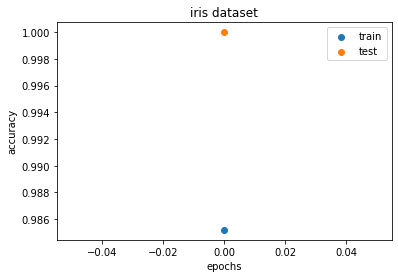

In [15]:
import matplotlib.pyplot as plt

plt.scatter(epochs, train_acc_list, label = 'train')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('iris dataset')

plt.scatter(epochs, test_acc_list, label = 'test')
plt.legend()